In [254]:
#kaggle이나 공공데이터포털 가서 csv 데이터 파일을 받아서 결측치 제거하고 이래저래 처리해서 제출

#인터넷에서 데이터셋 검색해서 분석하는 자료들 참고

In [3]:
# 필요한 라이브러리를 import 합니다

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
# read_csv() 메소드를 사용해 df 이름의 데이터 프레임으로 저장합니다.
# index_col 옵션을 사용하면 인덱스에도 열 이름을 붙일 수 있습니다.

df = pd.read_csv('culture.csv', encoding='cp949')
df

,번호,주제분류,문화시설명,주소,위도,경도,전화번호,팩스번호,홈페이지,관람시간,...,기타사항,시설소개,무료구분,지하철,버스정거장,YELLOW,GREEN,BLUE,RED,공항버스
0,1,기타,경희대학교,서울특별시 동대문구 경희대로 26,37.595080,127.049302,02) 961-0114,NaN,https://www.khu.ac.kr/kor/main/index.do,NaN,...,NaN,<span style=&quot;color: rgb(85 85 85); font-f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,공연장,우란2경,서울특별시 성동구 연무장7길 11,37.543789,127.054419,02-465-1418,NaN,http://www.wooranfdn.org/main.jsp,NaN,...,NaN,<h3 class=&quot;space-content-title&quot;>비움으로...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,도서관,구립은평뉴타운도서관,서울특별시 은평구 진관2로 111-51,37.637230,126.933118,(02) 6341-6400,NaN,http://www.enlib.or.kr/,NaN,...,NaN,<p class=&quot;0&quot; style=&quot;line-height...,NaN,NaN,NaN,NaN,(지선) 7211 (지선) 7723,NaN,NaN,NaN
3,4,문화예술회관,노원문화예술회관,서울특별시 노원구 중계로 181,37.650236,127.080269,02-2289-3400,NaN,https://www.nowonart.kr/,NaN,...,NaN,<p><font face=&quot;돋움&quot; size=&quot;2&quot...,NaN,4호선 상계역 : 4번 출구 - 1143번 1140번 버스(노원문화예술회관 하차) ...,NaN,NaN,NaN,NaN,NaN,NaN
4,5,미술관,서울시립미술관 SeMA창고,서울특별시 은평구 통일로 684,37.609405,126.934955,02-2124-8868,NaN,https://sema.seoul.go.kr,NaN,...,NaN,<div><span style=&quot;font-size: 13.3333px;&q...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,공연장,광진어린이공연장,서울특별시 광진구 능동로 400,37.565011,127.084597,02-2049-4700,NaN,http://www.naruart.or.kr/src/rentinfo.php?info...,NaN,...,NaN,<h3 class='naru_sub_title' style='box-sizing: ...,무료,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,804,도서관,까망돌도서관,서울특별시 동작구 서달로 129,37.505120,126.960611,02)815-3701,NaN,https://lib.dongjak.go.kr,NaN,...,NaN,까망돌도서관 지하 2층에서 지상 5층으로 구성 지상 5층 - 옥상정원 / 문화...,무료,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,805,기타,도봉문화재단,서울특별시 도봉구 노해로63길 43,37.652710,127.043942,02-908-2900,02-908-2925,http://www.dbfac.or.kr/,NaN,...,NaN,<p><span style='color: rgb(86 86 86); font-fam...,무료,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,806,박물관/기념관,둘리뮤지엄,서울 도봉구 쌍문동 산 250,37.652173,127.024530,02-990-2200,NaN,https://www.doolymuseum.or.kr,NaN,...,NaN,<p><span style='color: rgb(71 71 71); font-fam...,무료,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 데이터프레임의 shape를 확인합니다.
df.shape

(807, 25)

In [6]:
# 필요한 컬럼만 선택
culture = df.loc[:, "번호":"경도"]
culture[['무료구분', '관람료']] = df[['무료구분', '관람료']]
culture

,번호,주제분류,문화시설명,주소,위도,경도,무료구분,관람료
0,1,기타,경희대학교,서울특별시 동대문구 경희대로 26,37.595080,127.049302,NaN,NaN
1,2,공연장,우란2경,서울특별시 성동구 연무장7길 11,37.543789,127.054419,NaN,NaN
2,3,도서관,구립은평뉴타운도서관,서울특별시 은평구 진관2로 111-51,37.637230,126.933118,NaN,NaN
3,4,문화예술회관,노원문화예술회관,서울특별시 노원구 중계로 181,37.650236,127.080269,NaN,NaN
4,5,미술관,서울시립미술관 SeMA창고,서울특별시 은평구 통일로 684,37.609405,126.934955,NaN,NaN
...,...,...,...,...,...,...,...,...
802,803,공연장,광진어린이공연장,서울특별시 광진구 능동로 400,37.565011,127.084597,무료,NaN
803,804,도서관,까망돌도서관,서울특별시 동작구 서달로 129,37.505120,126.960611,무료,0
804,805,기타,도봉문화재단,서울특별시 도봉구 노해로63길 43,37.652710,127.043942,무료,0
805,806,박물관/기념관,둘리뮤지엄,서울 도봉구 쌍문동 산 250,37.652173,127.024530,무료,0


In [7]:
# 데이터프레임의 데이터 상위 5개를 확인합니다.
culture.head(5)

,번호,주제분류,문화시설명,주소,위도,경도,무료구분,관람료
0,1,기타,경희대학교,서울특별시 동대문구 경희대로 26,37.595080,127.049302,NaN,NaN
1,2,공연장,우란2경,서울특별시 성동구 연무장7길 11,37.543789,127.054419,NaN,NaN
2,3,도서관,구립은평뉴타운도서관,서울특별시 은평구 진관2로 111-51,37.637230,126.933118,NaN,NaN
3,4,문화예술회관,노원문화예술회관,서울특별시 노원구 중계로 181,37.650236,127.080269,NaN,NaN
4,5,미술관,서울시립미술관 SeMA창고,서울특별시 은평구 통일로 684,37.609405,126.934955,NaN,NaN


In [8]:
# 데이터프레임의 데이터 하위 5개를 확인합니다.
culture.tail(5)

,번호,주제분류,문화시설명,주소,위도,경도,무료구분,관람료
802,803,공연장,광진어린이공연장,서울특별시 광진구 능동로 400,37.565011,127.084597,무료,NaN
803,804,도서관,까망돌도서관,서울특별시 동작구 서달로 129,37.505120,126.960611,무료,0
804,805,기타,도봉문화재단,서울특별시 도봉구 노해로63길 43,37.652710,127.043942,무료,0
805,806,박물관/기념관,둘리뮤지엄,서울 도봉구 쌍문동 산 250,37.652173,127.024530,무료,0
806,807,기타,서울새활용플라자,서울특별시 성동구 자동차시장길 49,37.558685,127.057851,무료,0


In [9]:
# info() 메소드로 각열의 정보를 확인합니다.
culture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      807 non-null    int64  
 1   주제분류    807 non-null    object 
 2   문화시설명   807 non-null    object 
 3   주소      805 non-null    object 
 4   위도      806 non-null    float64
 5   경도      806 non-null    float64
 6   무료구분    590 non-null    object 
 7   관람료     271 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 50.6+ KB


In [10]:
culture.describe()

,번호,위도,경도
count,807.000000,806.000000,806.000000
mean,404.000000,37.548325,126.993254
std,233.105126,0.107433,0.066644
min,1.000000,35.020762,126.758754
25%,202.500000,37.517637,126.962519
50%,404.000000,37.557392,126.989927
75%,605.500000,37.579480,127.036098
max,807.000000,37.690809,127.260629


In [11]:
# 각 열의 결측치의 갯수를 확인합니다.
culture.isnull().sum()

번호         0
주제분류       0
문화시설명      0
주소         2
위도         1
경도         1
무료구분     217
관람료      536
dtype: int64

In [12]:
# NaN(결측치)를 확인합니다.
culture[culture['위도'].isnull() == True]

,번호,주제분류,문화시설명,주소,위도,경도,무료구분,관람료
510,505,기타,동작구 문화관광,서울 동작구 노량진동 47-2,NaN,NaN,유료,NaN


In [13]:
# 결측치가 존재하는 행을 모두 제거하고 df에 재저장합니다.
culture = culture[culture['위도'].notnull()]
culture

,번호,주제분류,문화시설명,주소,위도,경도,무료구분,관람료
0,1,기타,경희대학교,서울특별시 동대문구 경희대로 26,37.595080,127.049302,NaN,NaN
1,2,공연장,우란2경,서울특별시 성동구 연무장7길 11,37.543789,127.054419,NaN,NaN
2,3,도서관,구립은평뉴타운도서관,서울특별시 은평구 진관2로 111-51,37.637230,126.933118,NaN,NaN
3,4,문화예술회관,노원문화예술회관,서울특별시 노원구 중계로 181,37.650236,127.080269,NaN,NaN
4,5,미술관,서울시립미술관 SeMA창고,서울특별시 은평구 통일로 684,37.609405,126.934955,NaN,NaN
...,...,...,...,...,...,...,...,...
802,803,공연장,광진어린이공연장,서울특별시 광진구 능동로 400,37.565011,127.084597,무료,NaN
803,804,도서관,까망돌도서관,서울특별시 동작구 서달로 129,37.505120,126.960611,무료,0
804,805,기타,도봉문화재단,서울특별시 도봉구 노해로63길 43,37.652710,127.043942,무료,0
805,806,박물관/기념관,둘리뮤지엄,서울 도봉구 쌍문동 산 250,37.652173,127.024530,무료,0


In [14]:
# 데이터프레임의 shape를 확인하여 정보가 변경됨을 확인합니다.
culture.shape

(806, 8)

In [15]:
culture[culture['위도'].isnull() == True]

,번호,주제분류,문화시설명,주소,위도,경도,무료구분,관람료


In [16]:
# 무료구분이 무료이면서 관람료가 NaN인 데이터를 확인합니다
culture[(culture['관람료'].isnull()) & (culture['무료구분'] == '무료')]

,번호,주제분류,문화시설명,주소,위도,경도,무료구분,관람료
5,6,공연장,동숭무대,서울특별시 종로구 혜화로 35,37.588690,126.999171,무료,NaN
9,8,기타,금천예술공장,서울시 금천구 범안로15길 57,37.468915,126.891913,무료,NaN
16,16,문화예술회관,강북 문화예술회관,서울 강북구,37.640854,127.013342,무료,NaN
17,17,박물관/기념관,용산도시기억전시관,한강로3가 64-1 용산센트럴파크 해링턴스퀘어 공공시설동 12층,37.526866,126.966880,무료,NaN
18,18,기타,광진교 8번가,서울특별시 강동구 천호2동 527-2 광진교 8번가,37.545146,127.112688,무료,NaN
...,...,...,...,...,...,...,...,...
781,797,기타,무중력지대 도봉,서울특별시 도봉구 마들로11길 75,37.653159,127.048747,무료,NaN
786,798,기타,씨알방학간,서울특별시 도봉구 도봉로 666,37.664006,127.043019,무료,NaN
791,785,기타,강동문화재단,서울특별시 강동구 동남로 870,37.551220,127.157343,무료,NaN
797,794,공연장,KB 청춘마루,서울특별시 마포구 홍익로 18,37.554220,126.923010,무료,NaN


In [17]:
# 주소값이 서울특별시 또는 서울로 제대로 표기된 데이터만 추출
culture = culture[(culture['주소'].str.split(' ', expand=True)[0] == '서울특별시') | (culture['주소'].str.split(' ', expand=True)[0] == '서울')]
culture

,번호,주제분류,문화시설명,주소,위도,경도,무료구분,관람료
0,1,기타,경희대학교,서울특별시 동대문구 경희대로 26,37.595080,127.049302,NaN,NaN
1,2,공연장,우란2경,서울특별시 성동구 연무장7길 11,37.543789,127.054419,NaN,NaN
2,3,도서관,구립은평뉴타운도서관,서울특별시 은평구 진관2로 111-51,37.637230,126.933118,NaN,NaN
3,4,문화예술회관,노원문화예술회관,서울특별시 노원구 중계로 181,37.650236,127.080269,NaN,NaN
4,5,미술관,서울시립미술관 SeMA창고,서울특별시 은평구 통일로 684,37.609405,126.934955,NaN,NaN
...,...,...,...,...,...,...,...,...
802,803,공연장,광진어린이공연장,서울특별시 광진구 능동로 400,37.565011,127.084597,무료,NaN
803,804,도서관,까망돌도서관,서울특별시 동작구 서달로 129,37.505120,126.960611,무료,0
804,805,기타,도봉문화재단,서울특별시 도봉구 노해로63길 43,37.652710,127.043942,무료,0
805,806,박물관/기념관,둘리뮤지엄,서울 도봉구 쌍문동 산 250,37.652173,127.024530,무료,0


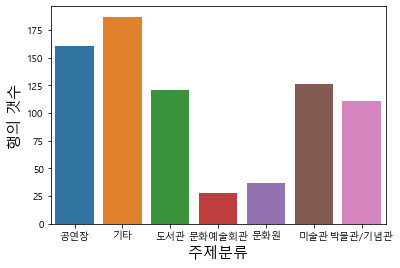

In [18]:
# seaborn을 활용하여 주제분류의 갯수를 count하여 시각화합니다.

x = culture.groupby('주제분류').count().index
y = culture.groupby('주제분류')['주제분류'].count()
x
sns.barplot(data=culture, x= x, y=y)
plt.xlabel('주제분류', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()

In [19]:
# 구군 컬럼 생성

culture['구군'] = culture['주소'].str.split(' ', expand=True)[1]
# 띄어쓰기로 주소를 추출했을때 이상치가 추출되는 것을 방지하기 위해 
for i, row in culture.iterrows() :
    # 구군에 빈 값이 들어갔을 경우
    if culture.at[i, '구군'] == "" :
        # 목표로 하는 값(~구)를 다시 추출
        culture.at[i, '구군'] = culture.at[i, '주소'].split(' ')[2]

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# 무료구분이 무료이면서 관람료가 NaN인 데이터의 관람료를 0으로 바꿔줍니다.

culture['관람료'][culture['관람료'].isnull()] = 0

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [21]:
culture[(culture['관람료'].isnull()) & (culture['무료구분'] == '무료')]

,번호,주제분류,문화시설명,주소,위도,경도,무료구분,관람료,구군


구군
강남구      67
강동구      16
강북구      17
강서구      12
관악구      14
광진구      20
구로구      22
금천구      19
노원구      20
도봉구      20
동대문구     24
동작구      18
마포구      34
서대문구     14
서초구      33
성동구      14
성북구      23
송파구      29
양천구      14
영등포구     15
용산구      65
은평구      21
종로구     169
중구       63
중랑구       8
Name: 구군, dtype: int64
Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구군')


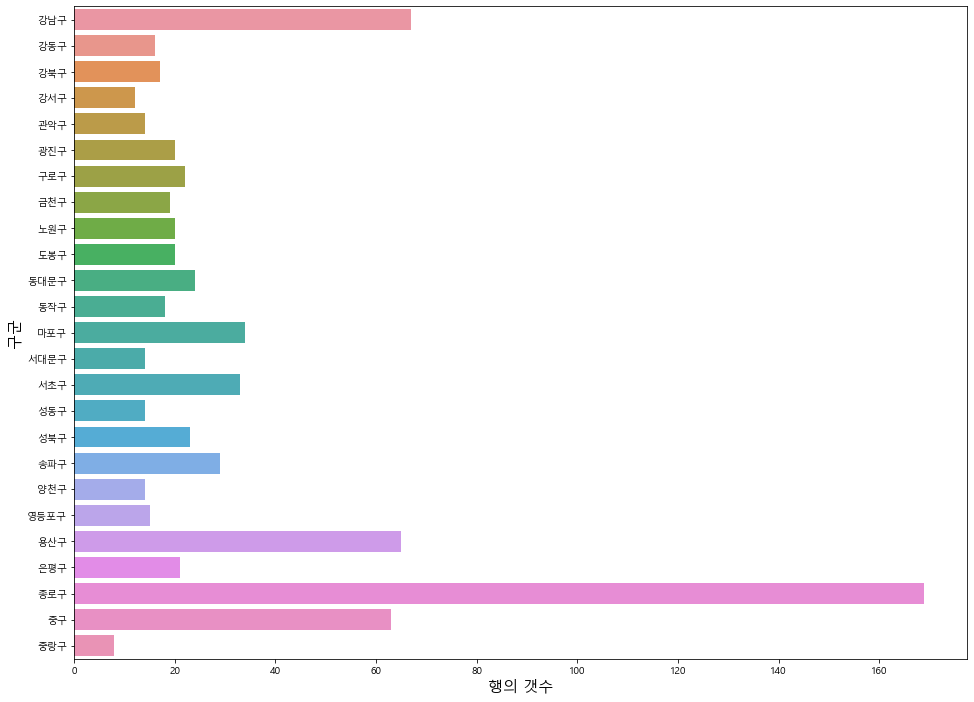

In [22]:
# seaborn을 활용하여 구군에 따라 count하여 시각화합니다.
plt.figure(figsize=(16,12))
y = culture.groupby('구군').count().index
x = culture.groupby('구군')['구군'].count()
print(x)
print(y)
sns.barplot(data=culture, x= x, y=y)
plt.xlabel('행의 갯수', fontsize=15)
plt.ylabel('구군', fontsize=15)
plt.show()

In [23]:
#경도, 위도 이상치 제거

culture = culture.loc[(culture['위도'] > 37) & (culture['경도'] < 132)]

<AxesSubplot:xlabel='경도', ylabel='위도'>

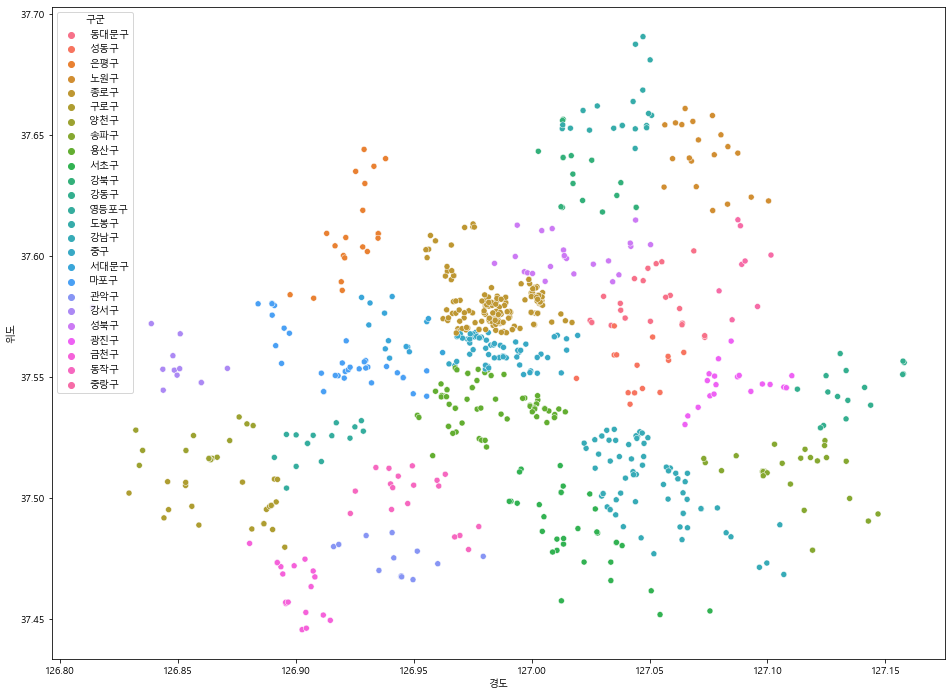

In [24]:
# 구군으로 분류하여 위도, 경도를 이용해 scatterplot 찍기

plt.figure(figsize=(16,12))
sns.scatterplot(data=culture, x='경도', y='위도', hue='구군')

In [25]:
# folium과 위도 경도 정보를 이용하여 서울시 문화시설을 지도에 표시하기
data = culture
culture_map = folium.Map(location = [data['위도'].mean(), data['경도'].mean()], zoom_start=12)

for i in data.index:
    culture_name = data.loc[i, "문화시설명"] + ' - ' + data.loc[i, '주소']
    popup = folium.Popup(culture_name, max_width=500)
    folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup).add_to(culture_map)

culture_map.save('./culture_map.html')
culture_map

<AxesSubplot:xlabel='경도', ylabel='위도'>

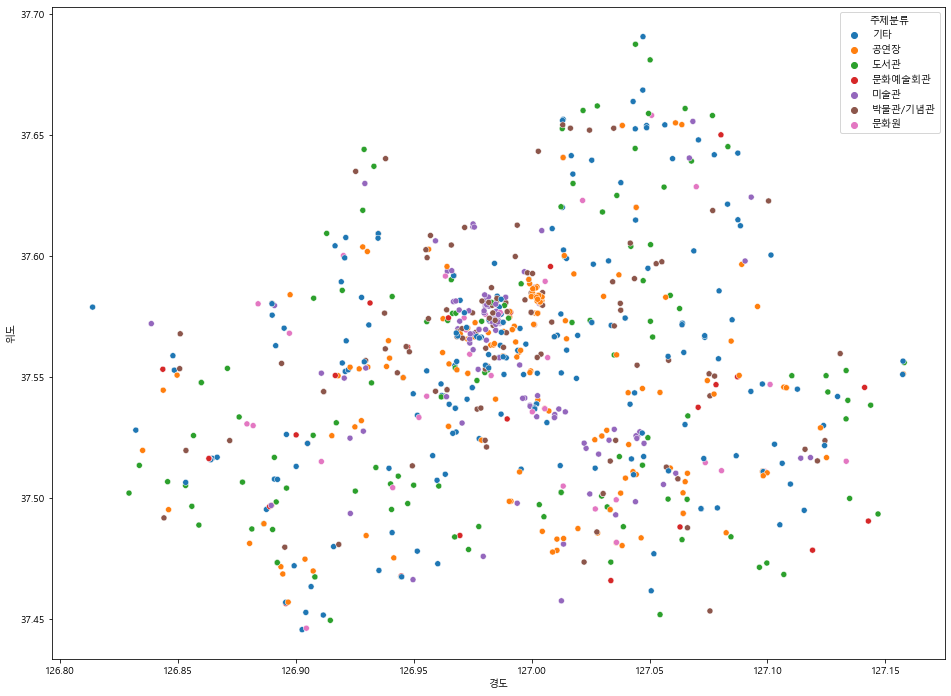

In [26]:
# 주제로 분류하여 위도, 경도를 이용해 scatterplot 찍기

plt.figure(figsize=(16,12))
sns.scatterplot(data=culture, x='경도', y='위도', hue='주제분류')

In [31]:
# folium과 위도 경도 정보를 이용하여 서울시 문화시설을 지도에 표시하기 - 문화시설 종류에 따라 마커 색을 다르게

data = culture
culture_map = folium.Map(location = [data['위도'].mean(), data['경도'].mean()], zoom_start=12)

for i in data.index:
    culture_name = data.loc[i, "문화시설명"] + ' - ' + data.loc[i, '주소']
    popup = folium.Popup(culture_name, max_width=500)
    if data.loc[i, '주제분류'] == '공연장' :
        folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, icon = folium.Icon(color='blue', icon='music')).add_to(culture_map)
    elif data.loc[i, '주제분류'] == '도서관' :
        folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, icon = folium.Icon(color='green', icon='book')).add_to(culture_map)
    elif data.loc[i, '주제분류'] == '문화예술회관' :
        folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, icon = folium.Icon(color='gray', icon = 'user')).add_to(culture_map)
    elif data.loc[i, '주제분류'] == '문화원' :
        folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, icon = folium.Icon(color='purple', icon = 'eye-open')).add_to(culture_map)
    elif data.loc[i, '주제분류'] == '미술관' :
        folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, icon = folium.Icon(color='lightred', icon='ok')).add_to(culture_map)
    elif data.loc[i, '주제분류'] == '박물관/기념관' :
        folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, icon = folium.Icon(color='pink', icon = 'hand-down')).add_to(culture_map)
    else :
        folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, icon = folium.Icon(color='orange', icon='star')).add_to(culture_map)

culture_map.save('./culture_map.html')
culture_map